### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [4]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo("LICI.NS")

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,873.308594,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,874.406128,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,838.984863,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,824.317505,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,815.038086,12444648
...,...,...,...,...,...,...
2023-04-28,548.500000,552.799988,546.549988,549.900024,549.900024,1231240
2023-05-02,552.000000,554.599976,549.200012,550.049988,550.049988,1224198
2023-05-03,550.950012,552.900024,550.000000,551.349976,551.349976,856689


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,873.308594,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,874.406128,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,838.984863,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,824.317505,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,815.038086,12444648


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,548.500000,552.799988,546.549988,549.900024,549.900024,1231240
2023-05-02,552.000000,554.599976,549.200012,550.049988,550.049988,1224198
2023-05-03,550.950012,552.900024,550.000000,551.349976,551.349976,856689
2023-05-04,552.000000,566.599976,549.099976,552.450012,552.450012,4283342
2023-05-05,552.500000,565.349976,551.650024,560.049988,560.049988,2503952


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
236    549.900024
237    550.049988
238    551.349976
239    552.450012
240    560.049988
Name: Close, Length: 241, dtype: float64

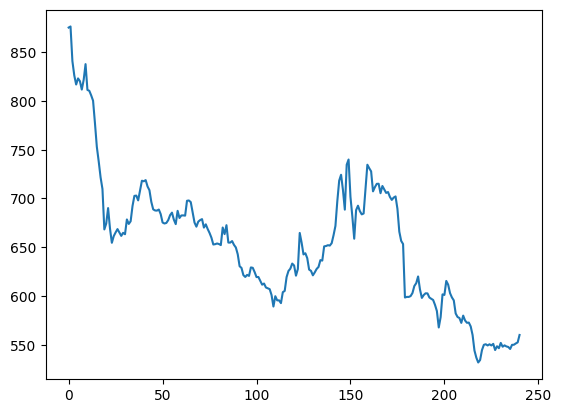

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
236    549.900024
237    550.049988
238    551.349976
239    552.450012
240    560.049988
Name: Close, Length: 241, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.99680704]
 [1.        ]
 [0.8969521 ]
 [0.85428171]
 [0.82728592]
 [0.84542816]
 [0.83730047]
 [0.81219172]
 [0.84107402]
 [0.88795363]
 [0.81117565]
 [0.80856328]
 [0.79492028]
 [0.77910022]
 [0.712627  ]
 [0.64194492]
 [0.59854866]
 [0.55108864]
 [0.51625555]
 [0.39593621]
 [0.41349786]
 [0.45950667]
 [0.39912917]
 [0.3561684 ]
 [0.37605239]
 [0.38708283]
 [0.3969521 ]
 [0.38693773]
 [0.37677808]
 [0.38592166]
 [0.38171263]
 [0.42568948]
 [0.41233686]
 [0.42031945]
 [0.4657475 ]
 [0.49579114]
 [0.49666194]
 [0.48243835]
 [0.51161103]
 [0.54092899]
 [0.53918723]
 [0.54281567]
 [0.52380265]
 [0.5127722 ]
 [0.47793911]
 [0.45573295]
 [0.45239488]
 [0.4519594 ]
 [0.45515254]
 [0.44150954]
 [0.41654572]
 [0.41364296]
 [0.41523962]
 [0.42365751]
 [0.43846168]
 [0.44600878]
 [0.42510889]
 [0.41175627]
 [0.45137881]
 [0.43004361]
 [0.43759071]
 [0.43773599]
 [0.4370103 ]
 [0.48127736]
 [0.48214815]
 [0.47721342]
 [0.44731506]
 [0.41640062]
 [0.404209  ]
 [0.41915827]
 [0.42380261]
 [0.42

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(156, 85)

In [17]:
train_data

array([[0.99680704],
       [1.        ],
       [0.8969521 ],
       [0.85428171],
       [0.82728592],
       [0.84542816],
       [0.83730047],
       [0.81219172],
       [0.84107402],
       [0.88795363],
       [0.81117565],
       [0.80856328],
       [0.79492028],
       [0.77910022],
       [0.712627  ],
       [0.64194492],
       [0.59854866],
       [0.55108864],
       [0.51625555],
       [0.39593621],
       [0.41349786],
       [0.45950667],
       [0.39912917],
       [0.3561684 ],
       [0.37605239],
       [0.38708283],
       [0.3969521 ],
       [0.38693773],
       [0.37677808],
       [0.38592166],
       [0.38171263],
       [0.42568948],
       [0.41233686],
       [0.42031945],
       [0.4657475 ],
       [0.49579114],
       [0.49666194],
       [0.48243835],
       [0.51161103],
       [0.54092899],
       [0.53918723],
       [0.54281567],
       [0.52380265],
       [0.5127722 ],
       [0.47793911],
       [0.45573295],
       [0.45239488],
       [0.451

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(152, 3)
(152,)


(None, None)

In [21]:

print(ytest)


[0.58853411 0.57808425 0.56879539 0.50928886 0.52177068 0.53164013
 0.53193033 0.50377373 0.52525403 0.51480417 0.50464452 0.50725689
 0.49274311 0.48388973 0.49071132 0.49419448 0.4573296  0.3892599
 0.36182881 0.35253995 0.19332376 0.19521045 0.19506535 0.1975328
 0.20667638 0.22757627 0.23599434 0.25602326 0.21727151 0.19216259
 0.20072576 0.20595069 0.20551538 0.19346887 0.18955021 0.18606687
 0.17140798 0.15312046 0.10420907 0.13512351 0.20275773 0.20101597
 0.24267064 0.2316402  0.20638617 0.19361397 0.18476059 0.14586357
 0.13541371 0.13236585 0.11785207 0.13947765 0.12496386 0.11814227
 0.11872286 0.10725693 0.0817127  0.03555878 0.01436869 0.
 0.00725689 0.03686506 0.05254002 0.0542816  0.05065316 0.0541365
 0.05065316 0.05544278 0.03701016 0.04818588 0.04252547 0.05820043
 0.04687961 0.05094354 0.0477504  0.04615392 0.0402033  0.05239492
 0.05283022 0.05660377 0.05979691]


In [58]:
print(X_test.shape), print(ytest.shape)

(81, 3, 1)
(81,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], time_step, 1))

# reshape X_test to match the input shape of the model
X_test = X_test.reshape((X_test.shape[0], time_step, 1))

In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_4 (LSTM)               (None, 3, 50)             20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 6s 602ms/step - loss: 0.1870 - val_loss: 0.0658
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.1637 - val_loss: 0.0546
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1391 - val_loss: 0.0432
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1108 - val_loss: 0.0322
Epoch 5/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0795 - val_loss: 0.0238
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0469 - val_loss: 0.0227
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0214 - val_loss: 0.0371
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0132 - val_loss: 0.0657
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0232 - val_loss: 0.0730
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0229 - val_loss: 0.0566
Epoch 11/100
3/3 [

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.12.0-rc1'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

676.9697861862724

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

626.1870539541848

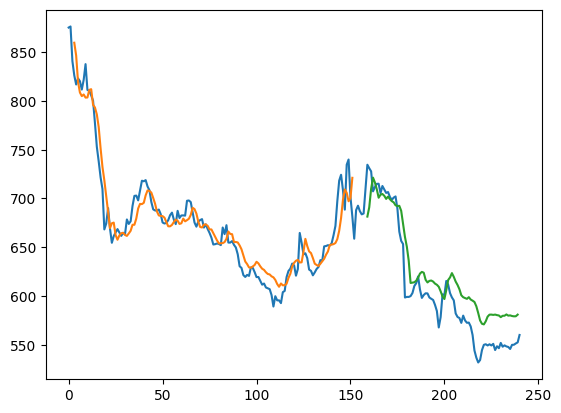

In [34]:
# ### Plotting 
# # shift train predictions for plotting
# look_back=100
# trainPredictPlot = numpy.empty_like(df1)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(df1)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(df1))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
### Plotting 
# shift train predictions for plotting
# shift train predictions for plotting
look_back = 3
trainPredictPlot = np.full((len(df1), 1), np.nan)
train_predict_len = len(X_train) - look_back
trainPredictPlot[look_back:look_back+train_predict_len, :] = train_predict[:train_predict_len]
# shift test predictions for plotting
testPredictPlot = np.full((len(df1), 1), np.nan)
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = np.resize(test_predict, (max(0, (len(df1)-1)-(len(train_predict)+(look_back*2)+1)), 1))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()






In [35]:
len(test_data)

85

In [45]:
x_input=test_data[82:].reshape(1,-1)
x_input.shape


(1, 3)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.05660377358490565, 0.05979691326877723, 0.08185780031068579]

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3
i=0
while(i<10):
    
    if(len(temp_input)>3):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.1470226]
4
1 day input [0.05979691 0.0818578  0.1470226 ]
1 day output [[0.15706913]]
2 day input [0.0818578  0.1470226  0.15706913]
2 day output [[0.17933972]]
3 day input [0.1470226  0.15706913 0.17933972]
3 day output [[0.20857193]]
4 day input [0.15706913 0.17933972 0.20857193]
4 day output [[0.21953629]]
5 day input [0.17933972 0.20857193 0.21953629]
5 day output [[0.23572211]]
6 day input [0.20857193 0.21953629 0.23572211]
6 day output [[0.25142142]]
7 day input [0.21953629 0.23572211 0.25142142]
7 day output [[0.2608469]]
8 day input [0.23572211 0.25142142 0.26084691]
8 day output [[0.27194694]]
9 day input [0.25142142 0.26084691 0.27194694]
9 day output [[0.28165781]]
[[0.14702260494232178], [0.157069131731987], [0.1793397217988968], [0.2085719257593155], [0.21953628957271576], [0.2357221096754074], [0.25142142176628113], [0.26084691286087036], [0.2719469368457794], [0.2816578149795532]]


In [49]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
day_new = np.arange(1, 4)
day_pred = np.arange(4, 14)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)


241

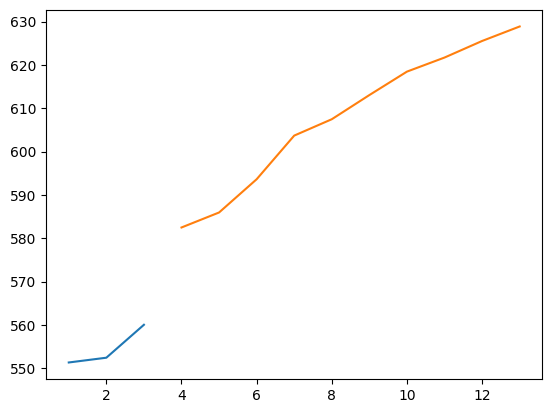

In [54]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_new, scaler.inverse_transform(df1[238:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


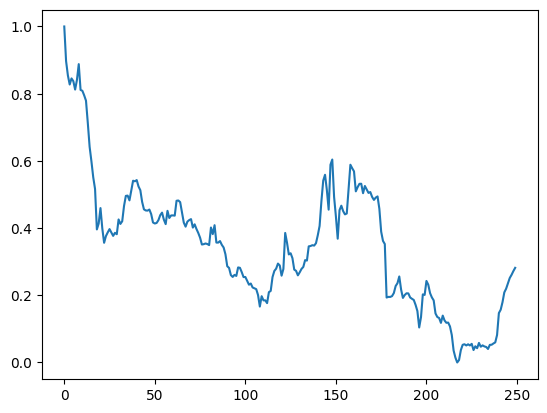

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

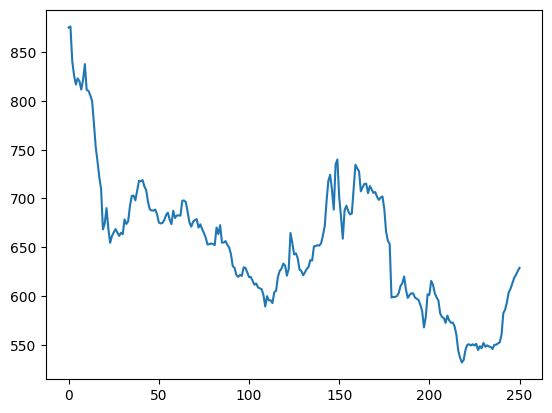

In [57]:
plt.plot(df3)